in this project we will try to find a correlation between player salaries and their characterstics.

1- does the number of games played affect the salary of the player?

2-does the awards recieved affect the player salary in the year following the award reception ?

In [106]:
import matplotlib as plt
import pandas as pp
import numpy  as np
import seaborn as sb
import scipy as sp

main_t=pp.read_csv('core\master.csv')
Awards=pp.read_csv('core\AwardsPlayers.csv')
Salaries=pp.read_csv('core\Salaries.csv')
apperances=pp.read_csv('core\Appearances.csv')

sal_recent=Salaries.query('yearID>=2000') #filter the year to exclude years before 2000.

master=main_t[['playerID','bats','throws','nameGiven']] # filter the master sheet to keep these values

app_main=apperances[['playerID','lgID','teamID','yearID','G_all','GS']] # only keep player info 

print sal_recent.info()
print '--\n'
print master.info()
print '--\n'
print app_main.info()
print '--\n'
print Awards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13312 entries, 12263 to 25574
Data columns (total 5 columns):
yearID      13312 non-null int64
teamID      13312 non-null object
lgID        13312 non-null object
playerID    13312 non-null object
salary      13312 non-null int64
dtypes: int64(2), object(3)
memory usage: 624.0+ KB
None
--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 4 columns):
playerID     18846 non-null object
bats         17655 non-null object
throws       17868 non-null object
nameGiven    18807 non-null object
dtypes: object(4)
memory usage: 589.0+ KB
None
--

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 6 columns):
playerID    100951 non-null object
lgID        100214 non-null object
teamID      100951 non-null object
yearID      100951 non-null int64
G_all       100748 non-null float64
GS          49030 non-null float64
dtypes: float64(2), int64(1), object(3)


In [107]:


pl=sal_recent.merge(app_main,how='inner',on=('yearID','playerID','teamID','lgID')).merge(master,how='inner',on=('playerID')) 
#compine the two lists to have the salaries and apperances data
master_list=pl.merge(Awards,how='left',on=('playerID','yearID','lgID'))
#now we have the main list with awards data, we used left join to get all players regardless if they were rewarded or not

del master_list['tie'] 
del master_list['notes']
#removed un-wanted columns
master_list.head()



,yearID,teamID,lgID,playerID,salary,G_all,GS,bats,throws,nameGiven,awardID
0,2000,ANA,AL,anderga01,3250000,159.0,157.0,L,L,Garret Joseph,NaN
1,2001,ANA,AL,anderga01,4500000,161.0,161.0,L,L,Garret Joseph,NaN
2,2002,ANA,AL,anderga01,5000000,158.0,157.0,L,L,Garret Joseph,Silver Slugger
3,2002,ANA,AL,anderga01,5000000,158.0,157.0,L,L,Garret Joseph,TSN All-Star
4,2003,ANA,AL,anderga01,5350000,159.0,159.0,L,L,Garret Joseph,Silver Slugger


       here are the columns we want to have in the main list

playerID  :  Player ID Number 

bats      :  Player's batting hand (left, right, or both) 

throws    :  Player's throwing hand (left or right) 

nameGiven :  player name 

yearID    :  Year 

teamID    :  team 

lgID      :  league 

salary    :  salary 

G_all     :  total games 

GS        :  Games started 

AwardID   :  Name of award won 


In [108]:
sal_years=master_list.groupby('yearID').mean()['salary'] 
# get average salary per year
 
     
sal_teams=master_list.groupby(['yearID'])['salary'].transform(max)==master_list['salary'] 
# get the index of maximum salary per year and player info



print str(sal_years)+"\n"

master_list[sal_teams]

# get the player with amximum salary every year **A player might have more than an award in one year

yearID
2000    2162651
2001    2505624
2002    2709550
2003    2789489
2004    2689514
2005    2886168
2006    2974991
2007    3208241
2008    3241643
2009    3486617
2010    3439953
2011    3445759
2012    3549364
2013    3798741
2014    4015533
2015    4277682
Name: salary, dtype: int64



,yearID,teamID,lgID,playerID,salary,G_all,GS,bats,throws,nameGiven,awardID
1227,2004,BOS,AL,ramirma02,22500000,152.0,150.0,R,R,Manuel Aristides,Hank Aaron Award
1228,2004,BOS,AL,ramirma02,22500000,152.0,150.0,R,R,Manuel Aristides,Silver Slugger
1229,2004,BOS,AL,ramirma02,22500000,152.0,150.0,R,R,Manuel Aristides,TSN All-Star
2041,2000,LAN,NL,brownke01,15714286,33.0,32.0,R,R,James Kevin,NaN
2978,2007,NYA,AL,giambja01,23428571,83.0,69.0,L,R,Jason Gilbert,NaN
3626,2001,TEX,AL,rodrial01,22000000,162.0,162.0,R,R,Alexander Enmanuel,Hank Aaron Award
3627,2001,TEX,AL,rodrial01,22000000,162.0,162.0,R,R,Alexander Enmanuel,Silver Slugger
3628,2001,TEX,AL,rodrial01,22000000,162.0,162.0,R,R,Alexander Enmanuel,TSN All-Star
3629,2002,TEX,AL,rodrial01,22000000,162.0,160.0,R,R,Alexander Enmanuel,Gold Glove
3630,2002,TEX,AL,rodrial01,22000000,162.0,160.0,R,R,Alexander Enmanuel,Hank Aaron Award


Populating the interactive namespace from numpy and matplotlib


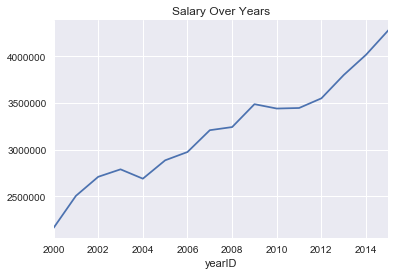

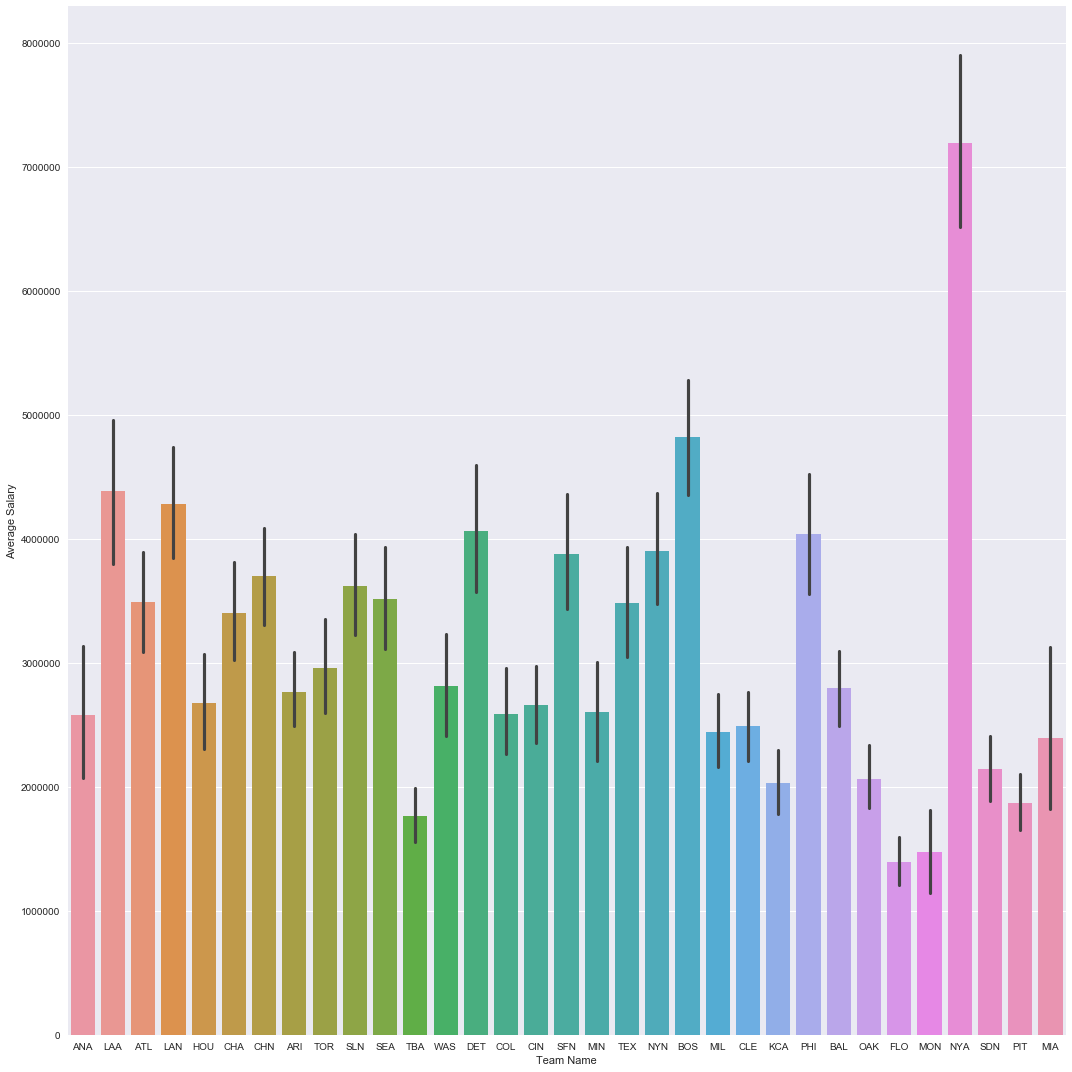

In [109]:
%pylab inline


sal_years.plot(x='yearID',y='salary',title='Salary Over Years') # line chart shows the mean salary per year


plot2=sb.factorplot('teamID','salary', data = master_list, kind = 'bar',size=15)

plot2.set_axis_labels("Team Name", "Average Salary")
#show average salary per team

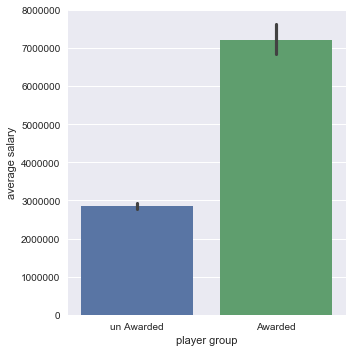

In [110]:
# a function t have a flag weather the player was awarded or not, i will deal with missing values as non awarded.
def is_awarded(data):
    if(pp.notnull(data)):
        return 'Awarded'
    else:
        return 'un Awarded'
    
master_list['awarded']=master_list['awardID'].apply(is_awarded)



plot3=sb.factorplot('awarded','salary', data = master_list, kind = 'bar',size=5)
plot3.set_axis_labels("player group", "average salary")
#show average salary per player group (awarded or u awarded)

after looking at the graphs, the players salaries are getting higher every year, and the slaries varies according to the team where the player is at.

teams with high revenue usually sign the players with an expensive wage, but this is not the main reason,
the need of the player and his previous performances are also factors to signing the players with high contract.

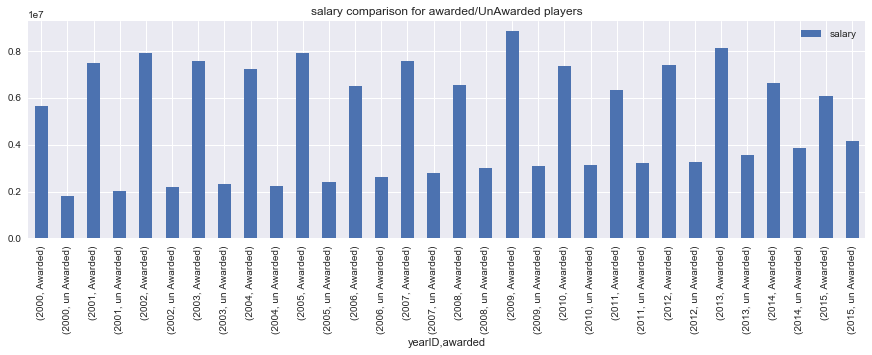

In [111]:


awards_sal=master_list[['awarded','yearID','salary']]
gg=awards_sal.groupby(['yearID','awarded']).mean()['salary']
#sb.factorplot('awarded','salary', data = awards_sal, kind = 'bar',size=5)
#sb.factorplot('awarded','salary', data = awards_sal,kind='bar')

gg.plot(kind='bar',figsize=(15,4),legend=True,title='salary comparison for awarded/UnAwarded players' )


in the previous chart we compared awrded players earning with un-awarded players, the difference os obvious,
awareded players tend to have higher salaries than un awareded.

but to know if the award directly affect the player salary we will show a player salary over the years and see if
the salary would change if he was rewarded in the previous year.

In [112]:

highestPaid=master_list[ (master_list.playerID == 'rodrial01') ] 
#filter the list to keep the player Alexander Enmanuel
aw_VS_Sal=highestPaid.groupby(['yearID','awarded','teamID'] ).mean()['salary']
#sb.factorplot(['yearID','awarded'],'salary', data = master_list, kind = 'bar',size=15)


print aw_VS_Sal.diff()
#get the change in salary over the years


yearID  awarded     teamID
2000    Awarded     SEA              NaN
2001    Awarded     TEX       17637500.0
2002    Awarded     TEX              0.0
2003    Awarded     TEX              0.0
2004    un Awarded  NYA              0.0
2005    Awarded     NYA        4000000.0
2006    un Awarded  NYA       -4319273.0
2007    Awarded     NYA        1027798.0
2008    Awarded     NYA        5291475.0
2009    Awarded     NYA        5000000.0
2010    un Awarded  NYA              0.0
2011    un Awarded  NYA       -1000000.0
2012    un Awarded  NYA       -2000000.0
2013    un Awarded  NYA       -1000000.0
2015    un Awarded  NYA       -7000000.0
Name: salary, dtype: float64


in the previous list, we took a random player and viewed his salary.

we can see that there's a relation between the awards and the salary, if the player get a reward his salary rises
the next year and vise versa.


.

now before we work on the total games, i want to deal with missing values.

i will compare both means for salaries with total games available and missing, by doing so i can conclude to keep mising values or not.

if the p value reulted is less than alpha ( .05 ), i can conclude to reject the null hypothesis (which states that both means are equal) and keep all the records, if the p value is more than .05 it means that my null hypothesis is correct and the mean for both samples is close, and i can exclude the null values. 


In [113]:

with_total_games=master_list[master_list['G_all'].notnull()]
missing_total_games=master_list[master_list['G_all'].isnull()]

    

sp.stats.ttest_ind(with_total_games['salary'], missing_total_games['salary'])


Ttest_indResult(statistic=-0.7801231391037996, pvalue=0.43533254539069821)

we can exclude the missing values,the p value satisfy the null hypothesis and the means are the same.

C:\Users\Faisal.M\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


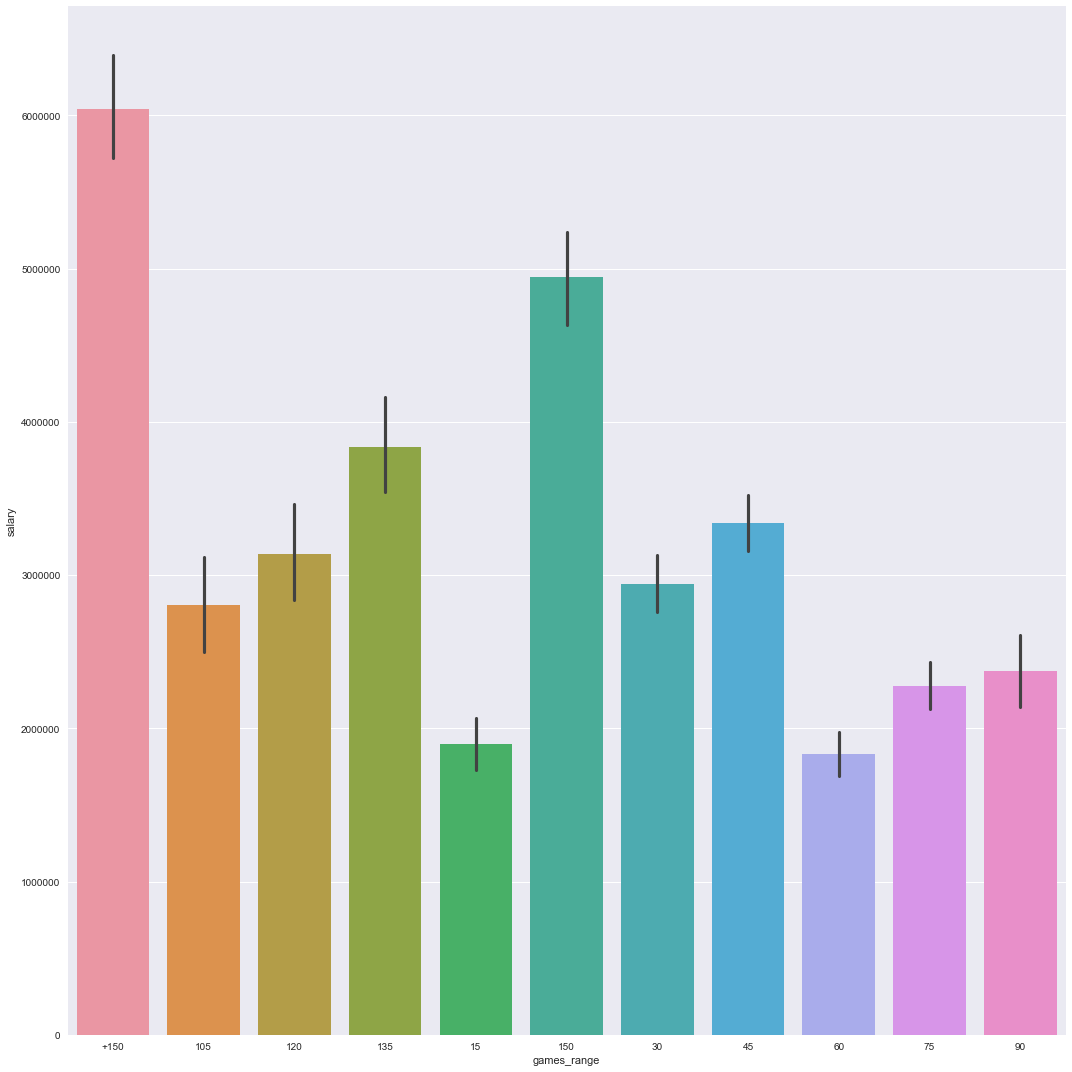

In [114]:

#group the total games played in groups of 30 
def salary_vs_games(data):
    if (data <= 15):
        return '15'
    elif(data <=30 ):
        return '30'
    elif(data <=45 ):
        return '45'
    elif( data <=60):
        return '60'
    elif(data <=75 ):
        return '75'
    elif ( data <=90):
        return '90'
    elif ( data <=105):
        return '105'
    elif ( data <=120):
        return '120'
    elif ( data <=135):
        return '135'
    elif ( data <=150):
        return '150'
    else:
        return '+150'




with_total_games['games_range']=with_total_games['G_all'].apply(salary_vs_games)


sb.factorplot('games_range','salary', data = with_total_games, kind = 'bar',size=15,row_order='games_range')






we can find that the players with higher number of games tend to have higher salaries.


in conclusion:

we can se alot of factors that maight determaine the player salary, but according to the famous rule corrleations doesn't imply causation.
the awards and games played per season seems to have effect on the player salary, the salary increases for players with awards due to the chance of signing with bigger teams and the bonuses on the cotracts after recieving the awards.
the performance of the player are not constant, and this is the main reason we can not predict his salary,
and there's the team need for a ceartin player with specific qualities that might make them pay more to convence him.


Refernces : 
    
   http://fisherpub.sjfc.edu/cgi/viewcontent.cgi?article=1029&context=sport_undergrad